## Basic imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
data_file = os.path.abspath(os.path.join(os.getcwd(), 'data', 'ndc_talks_manually_fixed.csv'))

## Load data

In [3]:
df = pd.read_csv(data_file)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244 entries, 0 to 3243
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Published          3244 non-null   object
 1   Type               3244 non-null   object
 2   Conference         3244 non-null   object
 3   Title              3244 non-null   object
 4   Speaker            3244 non-null   object
 5   Duration           3244 non-null   object
 6   DurationInMinutes  3244 non-null   int64 
 7   Link               3244 non-null   object
dtypes: int64(1), object(7)
memory usage: 202.9+ KB


In [5]:
df.head(5)

,Published,Type,Conference,Title,Speaker,Duration,DurationInMinutes,Link
0,2 weeks ago,other,NDC Porto 2023,NDC Porto - 16-20 October 2023,Conference for Software Developers,0:33,1,https://youtube.com/watch?v=tKnNqftbT4Q
1,3 weeks ago,talk,NDC Oslo 2023,Managing Kubernetes the GitOps way with Flux,Jeff French,1:00:38,61,https://youtube.com/watch?v=1DuxTlvmaNM
2,3 weeks ago,talk,NDC Oslo 2023,Make a great-looking 3D landscape visualization!,Kristoffer Dyrkorn,59:06,59,https://youtube.com/watch?v=AYU0vw6IyUY
3,3 weeks ago,talk,NDC Oslo 2023,OpenAPI & .NET: You're Doing It Wrong,Mark Rendle,57:15,57,https://youtube.com/watch?v=1K1LRzXeO_4
4,3 weeks ago,talk,NDC Oslo 2023,Design Good Schemas - Get a Better Database,Nuri Halperin,1:02:19,62,https://youtube.com/watch?v=iDWwoz9ZUzw


In [6]:
df['Conference'].value_counts()

Conference
NDC Oslo 2017                          175
NDC Oslo 2018                          174
NDC Oslo 2019                          172
NDC London 2017                        157
NDC Oslo 2023                          156
NDC Sydney 2017                        142
NDC Oslo 2020                          137
NDC Sydney 2018                        129
NDC Oslo 2022                          126
NDC Oslo 2021                          126
NDC Sydney 2016                        123
NDC London 2019                        114
NDC London 2020                        104
NDC London 2023                        103
NDC London 2022                         88
NDC London 2018                         87
NDC Sydney 2020                         81
NDC London 2021                         81
NDC Porto 2022                          81
NDC Sydney 2019                         78
NDC Melbourne 2022                      73
NDC Minnesota 2018                      61
NDC Minnesota 2019                      58


## Filter the talks

In [7]:
talks = df[df.Type == 'talk']
oslo_talks = talks[talks.Conference.str.contains("NDC Oslo")]
oslo_talks = oslo_talks.query('`DurationInMinutes` < 75 & `DurationInMinutes` > 20')
oslo_talks['Conference'].value_counts()

Conference
NDC Oslo 2017    162
NDC Oslo 2018    159
NDC Oslo 2019    154
NDC Oslo 2023    140
NDC Oslo 2022    113
NDC Oslo 2021    113
NDC Oslo 2020    112
NDC Oslo 2016     43
Name: count, dtype: int64

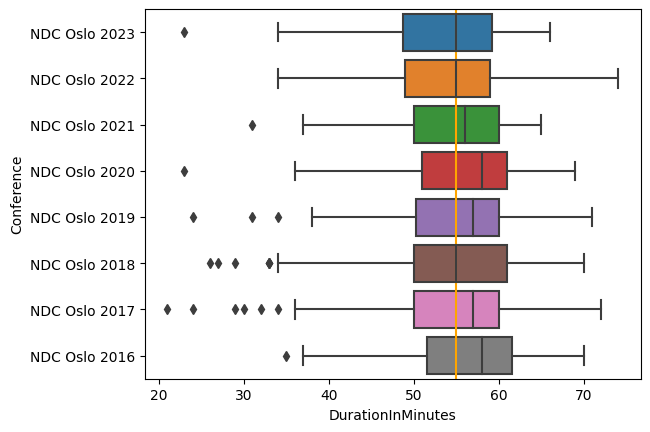

In [8]:
ax = sns.boxplot(oslo_talks, x='DurationInMinutes', y='Conference')
ax.axvline(x=55, color='orange')
plt.savefig('NDC_Oslo_talks_boxplot')

<Axes: xlabel='Conference', ylabel='DurationInMinutes'>

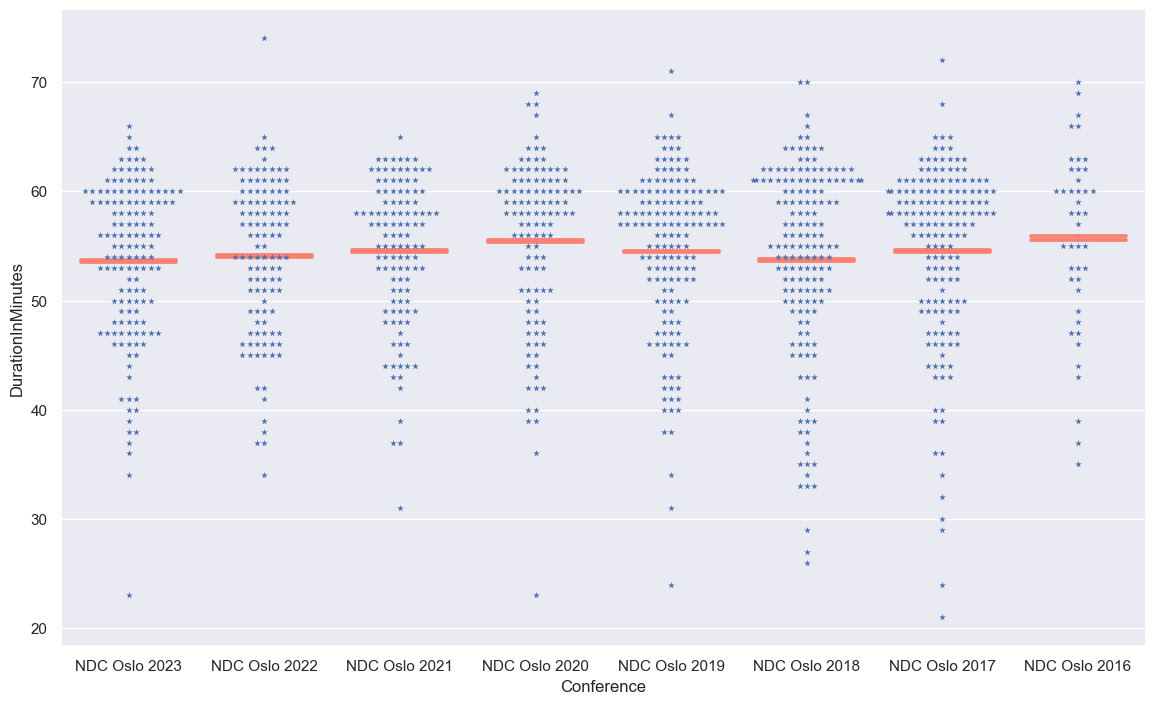

In [9]:
sns.set(rc={'figure.figsize':(14,8.27)})

spec = dict(x="Conference", 
            y="DurationInMinutes", 
            data=oslo_talks)

sns.swarmplot(**spec, marker="*")
sns.pointplot(**spec, 
              join=False, 
              errorbar=('ci', 10), 
              capsize=0.7, 
              scale=0, 
              color='salmon')

#plt.xticks(rotation=45, ha="right")
#https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot

In [10]:
group = oslo_talks.groupby(['Conference']).describe()
group.sort_values(by='Conference', ascending=False)

DurationInMinutes                                           
                          count       mean       std   min    25%   50%   
Conference                                                                
NDC Oslo 2023             140.0  53.642857  7.419662  23.0  48.75  55.0  \
NDC Oslo 2022             113.0  54.053097  7.146229  34.0  49.00  55.0   
NDC Oslo 2021             113.0  54.477876  6.693677  31.0  50.00  56.0   
NDC Oslo 2020             112.0  55.383929  7.822635  23.0  51.00  58.0   
NDC Oslo 2019             154.0  54.474026  7.557361  24.0  50.25  57.0   
NDC Oslo 2018             159.0  53.716981  8.954266  26.0  50.00  55.0   
NDC Oslo 2017             162.0  54.574074  8.403493  21.0  50.00  57.0   
NDC Oslo 2016              43.0  55.651163  8.374803  35.0  51.50  58.0   

                            
                 75%   max  
Conference                  
NDC Oslo 2023  59.25  66.0  
NDC Oslo 2022  59.00  74.0  
NDC Oslo 2021  60.00  65.0  
NDC Oslo 2020  61.00  69.0  
NDC Oslo 2019  60.00  71.0  
NDC Oslo 2018  61.00  70.0  
NDC Oslo 2017  60.00  72.0  
NDC Oslo 2016  61.50  70.0

In [13]:
oslo_talks.query('DurationInMinutes < 50')['Conference'].value_counts()

Conference
NDC Oslo 2023    38
NDC Oslo 2018    38
NDC Oslo 2017    37
NDC Oslo 2019    34
NDC Oslo 2022    31
NDC Oslo 2021    26
NDC Oslo 2020    25
NDC Oslo 2016    10
Name: count, dtype: int64

In [12]:
oslo_talks.query('`DurationInMinutes` < 40')['Conference'].value_counts()

Conference
NDC Oslo 2018    17
NDC Oslo 2017    10
NDC Oslo 2023     7
NDC Oslo 2022     5
NDC Oslo 2019     5
NDC Oslo 2021     4
NDC Oslo 2020     4
NDC Oslo 2016     3
Name: count, dtype: int64